# ISLR Chapter 2 - End of Chapter Applied exercises code portion solutions

Exercises from:
"An Introduction to Statistical Learning
with Applications in R" (Springer, 2013)
by
Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data:
http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions in Python by Arthur Avila

8. This exercise relates to the College data set, which can be found in the file College.csv . It contains a number of variables for 777 different universities and colleges in the US. The variables are  
  * `Private` : Public/private indicator  
  * `Apps` : Number of applications received  
  * `Accept` : Number of applicants accepted  
  * `Enroll` : Number of new students enrolled  
  * `Top10perc` : New students from top 10 % of high school class  
  * `Top25perc` : New students from top 25 % of high school class  
  * `F.Undergrad` : Number of full-time undergraduates  
  * `P.Undergrad` : Number of part-time undergraduates  
  * `Outstate` : Out-of-state tuition  
  * `Room.Board` : Room and board costs  
  * `Books` : Estimated book costs  
  * `Personal` : Estimated personal spending  
  * `PhD` : Percent of faculty with Ph.D.’s  
  * `Terminal` : Percent of faculty with terminal degree  
  * `S.F.Ratio` : Student/faculty ratio  
  * `perc.alumni` : Percent of alumni who donate  
  * `Expend` : Instructional expenditure per student  
  * `Grad.Rate` : Graduation rate  

Before reading the data into `R` , it can be viewed in Excel or a text
editor.

  (a) Use the `read.csv()` function to read the data into `R` . Call the loaded data `college` . Make sure that you have the directory set to the correct location for the data.

In [1]:
# We are doing this in Python instead
import pandas as pd
college = pd.read_csv('College.csv')
print(college.head())

                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

(b) Look at the data using the `fix()` function. You should notice
that the first column is just the name of each university. We don’t
really want `R` to treat this as data. However, it may be handy to
have these names for later. Try the following commands:
```
> rownames ( college ) = college [ ,1]
> fix ( college )
```
You should see that there is now a `row.names` column with the
name of each university recorded. This means that `R` has given
each row a name corresponding to the appropriate university. `R`
will not try to perform calculations on the row names. However,
we still need to eliminate the first column in the data where the
names are stored. Try
```
> college = college [ , -1]
> fix ( college )
```
Now you should see that the first data column is `Private` . Note
that another column labeled `row.names` now appears before the
`Private` column. However, this is not a data column but rather
the name that `R` is giving to each row.

In [2]:
college = college.set_index('Unnamed: 0')
college.index.rename('University', inplace = True)
print(college.head())

                             Private  Apps  Accept  Enroll  Top10perc  \
University                                                              
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
University                                                                    
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific

(c)
  i. Use the `summary()` function to produce a numerical summary
of the variables in the data set.  

In [3]:
print(college.describe())

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

  ii. Use the `pairs()` function to produce a scatterplot matrix of
the first ten columns or variables of the data. Recall that
you can reference the first ten columns of a matrix `A` using
`A[,1:10]` .  

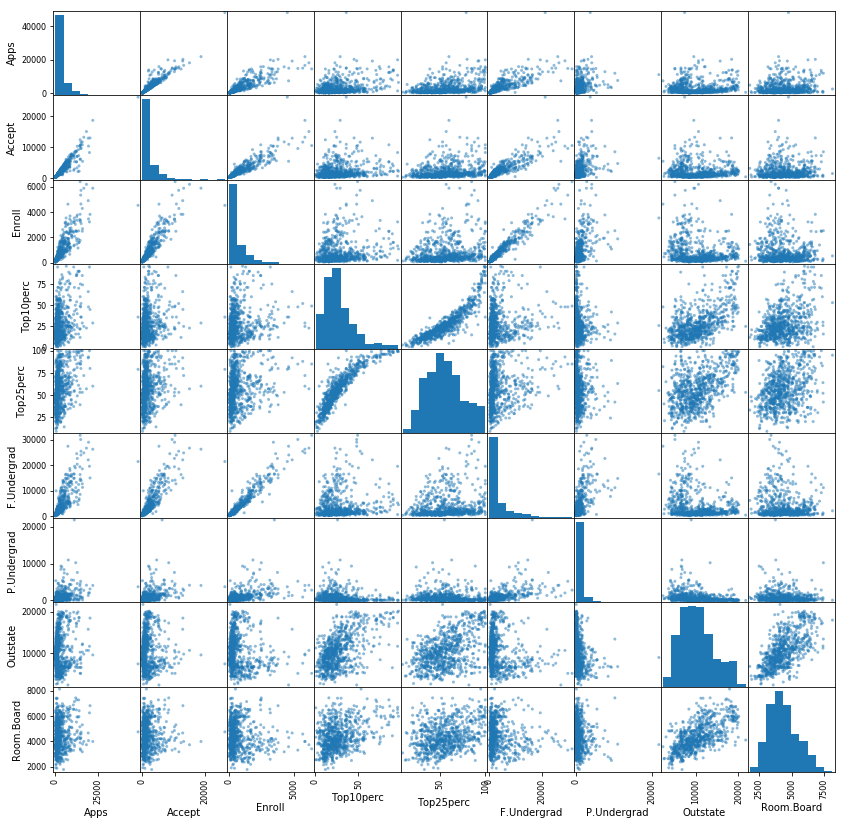

In [23]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(college.iloc[:,0:10], figsize=(14,14))
plt.show()

  iii. Use the `plot()` function to produce side-by-side boxplots of
`Outstate` versus `Private` .  

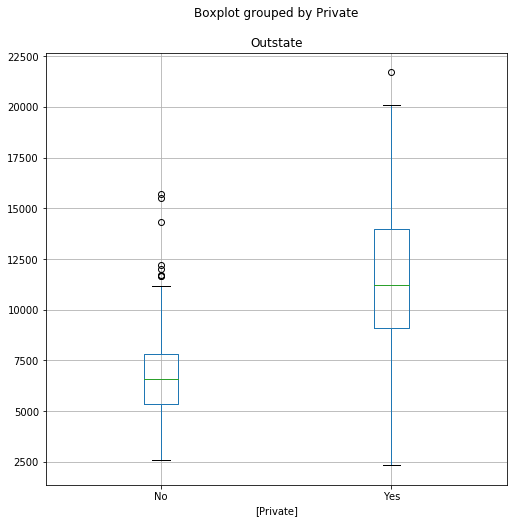

In [5]:
college[['Outstate','Private']].boxplot(by='Private', figsize=(8,8))
plt.show()

  iv. Create a new qualitative variable, called `Elite` , by binning
the `Top10perc` variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10% of their high school
classes exceeds 50%.
```
> Elite = rep ("No", nrow(college))
> Elite [college$Top10perc > 50] = "Yes"
> Elite = as.factor(Elite)
> college = data.frame(college, Elite)
```
Use the `summary()` function to see how many elite universities 
there are. Now use the `plot()` function to produce
side-by-side boxplots of `Outstate` versus `Elite` .  

count     777
unique      2
top        No
freq      699
Name: Elite, dtype: object


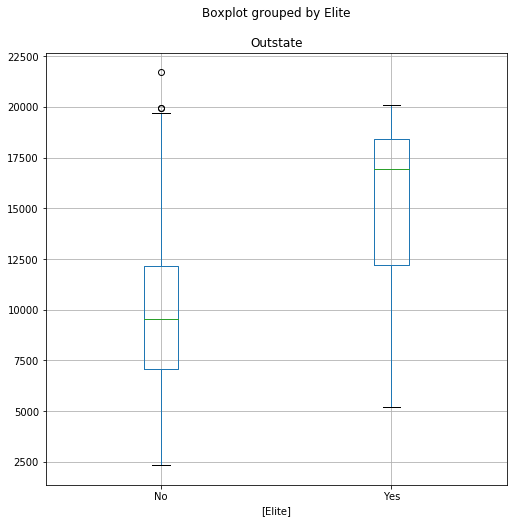

In [6]:
college['Elite'] = college.Top10perc.map(lambda x: 'Yes' if x > 50 else 'No')
print(college.Elite.describe())
college[['Outstate','Elite']].boxplot(by='Elite', figsize=(8,8))
plt.show()

  v. Use the `hist()` function to produce some histograms with
differing numbers of bins for a few of the quantitative variables. 
You may find the command `par(mfrow=c(2,2))` useful:
it will divide the print window into four regions so that four
plots can be made simultaneously. Modifying the arguments
to this function will divide the screen in other ways.  

Graduation rate


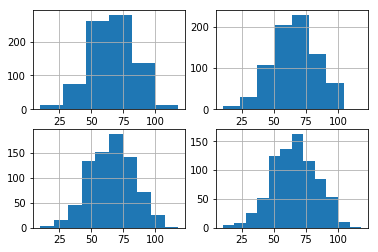

% PhD faculty


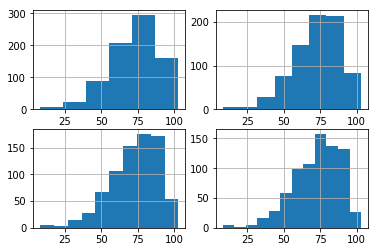

Instructional expenditure per student


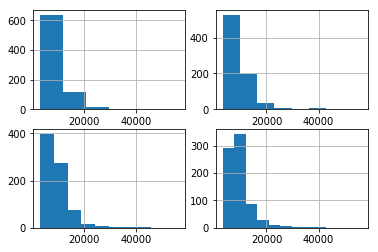

In [7]:
def histpanel(df,col):
    plt.subplot(2,2,1)
    df[col].hist(bins=6)
    plt.subplot(2,2,2)
    df[col].hist(bins=8)
    plt.subplot(2,2,3)
    df[col].hist(bins=10)
    plt.subplot(2,2,4)
    df[col].hist(bins=12)
    plt.show()
print('Graduation rate')
histpanel(college,'Grad.Rate')
print('% PhD faculty')
histpanel(college,'PhD')
print('Instructional expenditure per student')
histpanel(college,'Expend')

  vi. Continue exploring the data, and provide a brief summary
of what you discover.

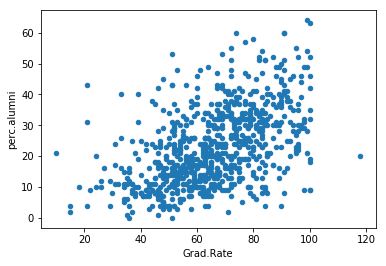

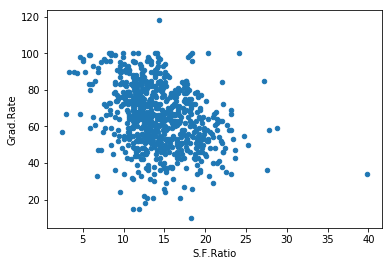

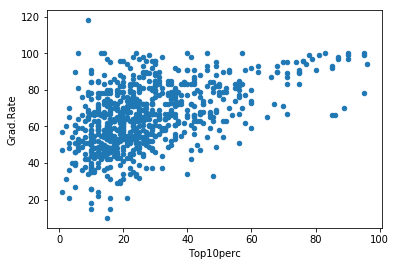

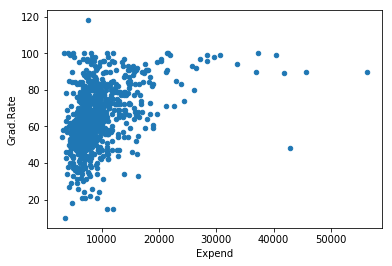

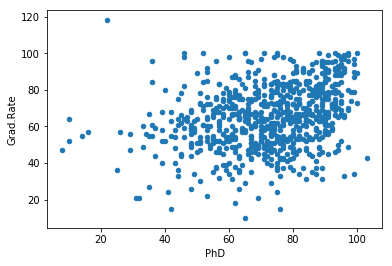

In [8]:
college.plot.scatter(x='Grad.Rate',y='perc.alumni')
plt.show()
college.plot.scatter(x='S.F.Ratio',y='Grad.Rate')
plt.show()
college.plot.scatter(x='Top10perc',y='Grad.Rate')
plt.show()
college.plot.scatter(x='Expend',y='Grad.Rate')
plt.show()
college.plot.scatter(x='PhD',y='Grad.Rate')
plt.show()


9. This exercise involves the `Auto` data set studied in the lab. Make sure that the missing values have been removed from the data.  

  (a) Which of the predictors are quantitative, and which are qualitative?  

In [9]:
auto = pd.read_table('Auto.data', delim_whitespace=True, na_values='?')
print(auto.shape)
auto.dropna(inplace=True)
print(auto.shape)
print(auto.info())
auto[['cylinders','year','origin','name']] = auto[['cylinders','year','origin','name']].astype('category')
print("\n\nCategorical variables are qualitative\n\nFloat variables are quantitative\n\n")
print(auto.info())

(397, 9)
(392, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB
None


Categorical variables are qualitative

Float variables are quantitative


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null category
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null category
origin          392 non-null category
name 

  (b) What is the range of each quantitative predictor? You can answer this using the `range()` function.  

In [10]:
print(auto.quantile(q=[0,1]))

      mpg  displacement  horsepower  weight  acceleration
0.0   9.0          68.0        46.0  1613.0           8.0
1.0  46.6         455.0       230.0  5140.0          24.8


  (c) What is the mean and standard deviation of each quantitative
predictor?  

In [11]:
quant = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

print(pd.DataFrame({'mean':auto[quant].mean(),'std':auto[quant].std()}))

                     mean         std
mpg             23.445918    7.805007
displacement   194.411990  104.644004
horsepower     104.469388   38.491160
weight        2977.584184  849.402560
acceleration    15.541327    2.758864


  (d) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?  

In [12]:
auto2 = auto.query('10 > index or index > 84')
print(auto2.describe())

              mpg  displacement  horsepower       weight  acceleration
count  318.000000    318.000000  318.000000   318.000000    318.000000
mean    24.338994    188.389937  101.235849  2942.506289     15.695597
std      7.885977    100.424205   36.185088   812.971260      2.719850
min     11.000000     68.000000   46.000000  1649.000000      8.500000
25%     18.000000    102.000000   75.000000  2216.000000     14.000000
50%     23.900000    146.000000   90.500000  2797.500000     15.500000
75%     30.500000    256.000000  115.000000  3523.750000     17.275000
max     46.600000    455.000000  230.000000  4997.000000     24.800000


  (e) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.  

In [13]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null category
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null category
origin          392 non-null category
name            392 non-null category
dtypes: category(4), float64(5)
memory usage: 33.7 KB


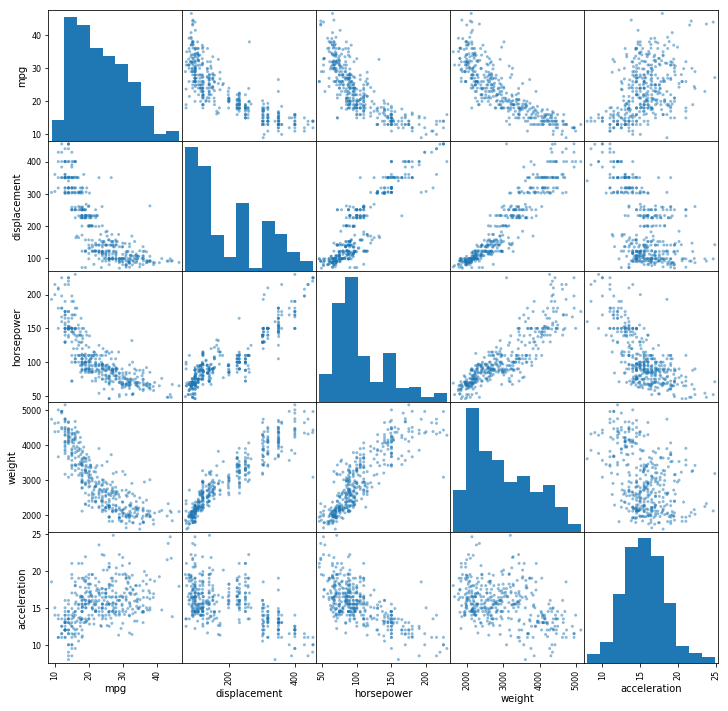

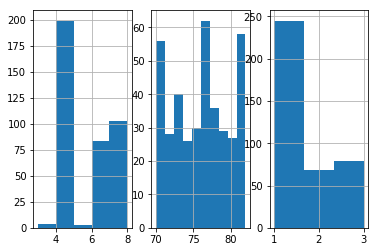

In [14]:
pd.plotting.scatter_matrix(auto, figsize=(12,12))
plt.show()

plt.subplot(1,3,1)
auto.cylinders.hist(bins=5)
plt.subplot(1,3,2)
auto.year.hist()
plt.subplot(1,3,3)
auto.origin.hist(bins=3)
plt.show()

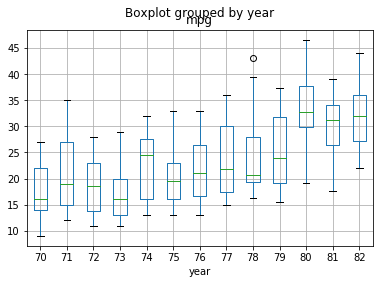

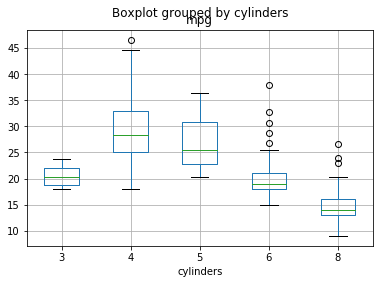

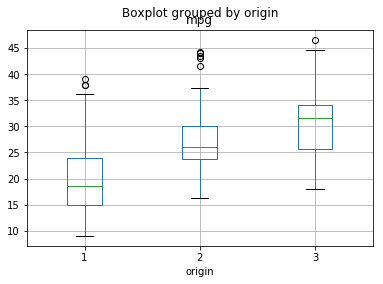

In [15]:
auto.boxplot('mpg',by='year')
plt.show()
auto.boxplot('mpg',by='cylinders')
plt.show()
auto.boxplot('mpg',by='origin')
plt.show()

  (f) Suppose that we wish to predict gas mileage (`mpg`) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting `mpg`? Justify your
answer.

10. This exercise involves the `Boston` housing data set.  

  (a) To begin, load in the Boston data set. The Boston data set is
part of the `MASS` library in `R`.
```
> library ( MASS )
```  
  Now the data set is contained in the object `Boston`.
```
> Boston
```
  Read about the data set:
```
> ? Boston
```
  How many rows are in this data set? How many columns? What
do the rows and columns represent?

In [16]:
# In Python, the Boston dataset is part of sklearn.datasets
from sklearn.datasets import load_boston
BostonData = load_boston()
Boston = pd.DataFrame(BostonData.data, columns = BostonData.feature_names)
Boston['MEDV'] = BostonData.target
print(Boston.head())
print('\nNumber of rows and columns:\n')
print(Boston.shape)
print('\n\n')
print(BostonData.DESCR)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Number of rows and columns:

(506, 14)



Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
 

  (b) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

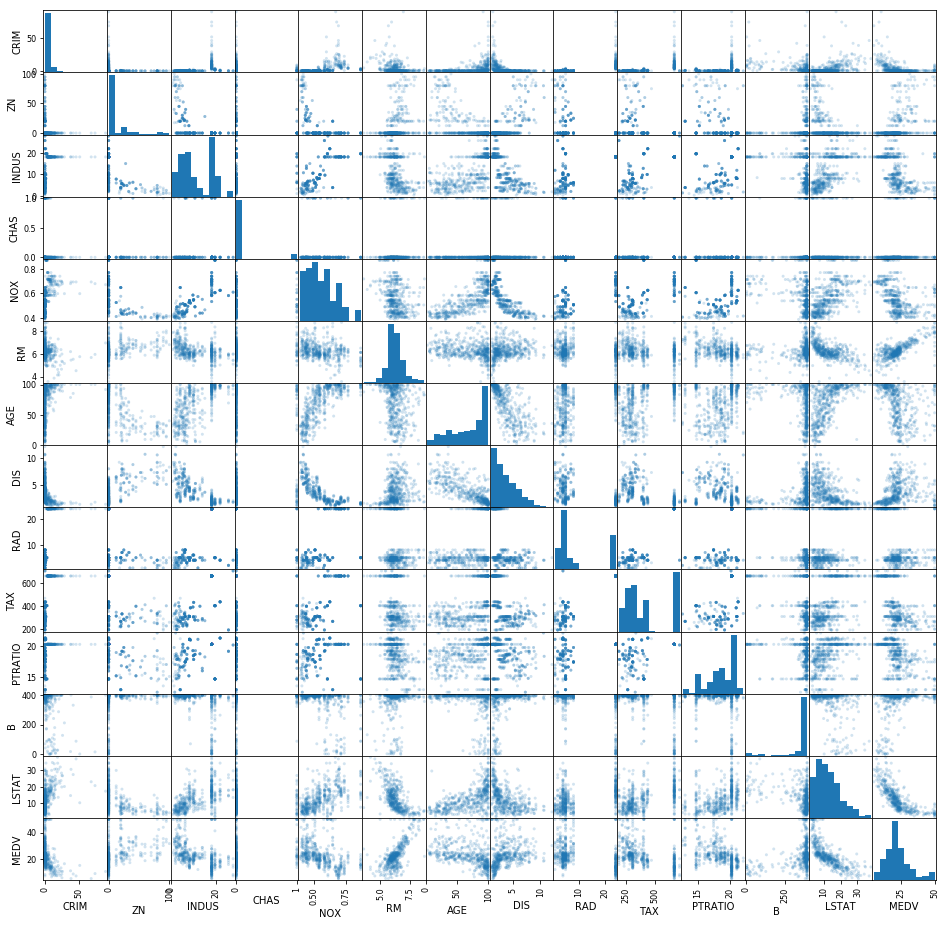

In [17]:
pd.plotting.scatter_matrix(Boston, figsize=(16,16), alpha=0.2)
plt.show()

(c) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.
(d) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

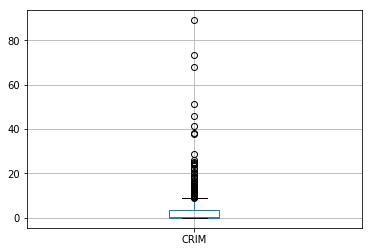

There are 8 high crime rate extreme outliers


In [18]:
print(Boston.describe())
Boston.boxplot('CRIM')
plt.show()
outl = Boston.CRIM.where(Boston.CRIM > Boston.CRIM.mean()+3*Boston.CRIM.std()).count()
print(f"There are {outl} high crime rate extreme outliers")

(e) How many of the suburbs in this data set bound the Charles
river?

In [19]:
print(Boston.CHAS.sum())

35.0


(f) What is the median pupil-teacher ratio among the towns in this
data set?

In [20]:
print(Boston.PTRATIO.median())

19.05


(g) Which suburb of Boston has lowest median value of owner-
occupied homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [21]:
print(Boston[Boston.AGE == Boston.AGE.min()])
print('\nPercentiles\n')
print(Boston.rank(pct=True)[Boston.AGE == Boston.AGE.min()])
print('\nRatio with mean\n')
print(Boston[Boston.AGE == Boston.AGE.min()]/Boston.mean())

       CRIM   ZN  INDUS  CHAS    NOX    RM  AGE     DIS  RAD    TAX  PTRATIO  \
41  0.12744  0.0   6.91   0.0  0.448  6.77  2.9  5.7209  3.0  233.0     17.9   

         B  LSTAT  MEDV  
41  385.41   4.84  26.6  

Percentiles

        CRIM        ZN    INDUS      CHAS      NOX        RM       AGE  \
41  0.355731  0.368577  0.37747  0.466403  0.23913  0.806324  0.001976   

         DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
41  0.809289  0.125494  0.098814  0.355731  0.357708  0.114625  0.772727  

Ratio with mean

        CRIM   ZN     INDUS  CHAS       NOX        RM      AGE       DIS  \
41  0.035461  0.0  0.620467   0.0  0.807651  1.077231  0.04229  1.507467   

         RAD       TAX   PTRATIO         B     LSTAT      MEDV  
41  0.314156  0.570747  0.969899  1.080566  0.382516  1.180501  


(h) In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [22]:
sevencount = Boston.RM[Boston.RM > 7].count()
eightcount = Boston.RM[Boston.RM > 8].count()
print(f'There are {sevencount} suburbs that average more than 7 rooms per dwelling.\n')
print(f'There are {eightcount} suburbs that average more than 7 rooms per dwelling.\n')
print(Boston[Boston.RM > 8])


There are 64 suburbs that average more than 7 rooms per dwelling.

There are 13 suburbs that average more than 7 rooms per dwelling.

        CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
97   0.12083   0.0   2.89   0.0  0.4450  8.069  76.0  3.4952   2.0  276.0   
163  1.51902   0.0  19.58   1.0  0.6050  8.375  93.9  2.1620   5.0  403.0   
204  0.02009  95.0   2.68   0.0  0.4161  8.034  31.9  5.1180   4.0  224.0   
224  0.31533   0.0   6.20   0.0  0.5040  8.266  78.3  2.8944   8.0  307.0   
225  0.52693   0.0   6.20   0.0  0.5040  8.725  83.0  2.8944   8.0  307.0   
226  0.38214   0.0   6.20   0.0  0.5040  8.040  86.5  3.2157   8.0  307.0   
232  0.57529   0.0   6.20   0.0  0.5070  8.337  73.3  3.8384   8.0  307.0   
233  0.33147   0.0   6.20   0.0  0.5070  8.247  70.4  3.6519   8.0  307.0   
253  0.36894  22.0   5.86   0.0  0.4310  8.259   8.4  8.9067   7.0  330.0   
257  0.61154  20.0   3.97   0.0  0.6470  8.704  86.9  1.8010   5.0  264.0   
262  0.52014  20.0 